In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from scipy.spatial.transform import Rotation as R

In [7]:
R.from_rotvec(0 * np.array([0, 1, 0])).as_quat()
R.from_rotvec(np.pi * np.array([0, 1, 0])).as_quat()
R.from_rotvec(1.5 * np.pi * np.array([0, 1, 0])).as_quat()

array([ 0.        ,  0.70710678,  0.        , -0.70710678])

## Check Landmark Position

landmark init err:  [0.02081817 0.02725183 0.02964283]
landmark optimization err:  [3170.191726   3262.99587762 2066.18767762]


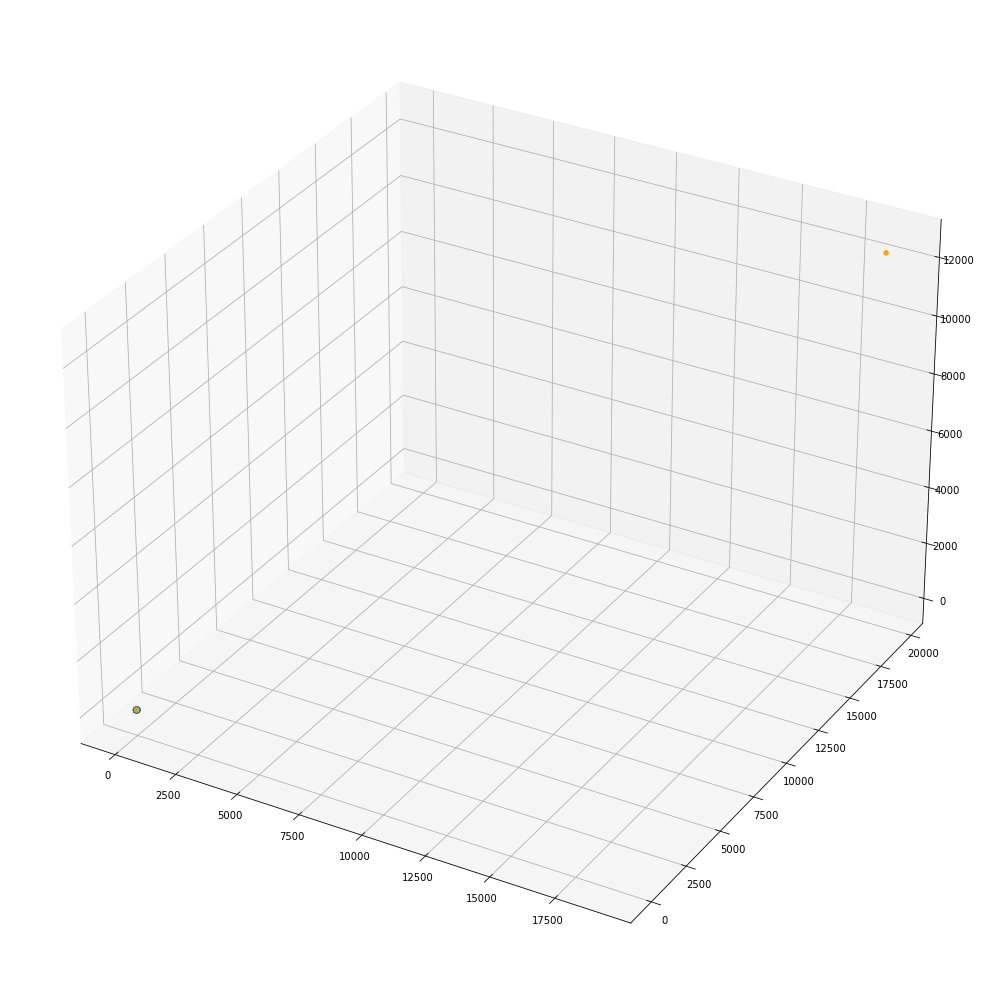

In [81]:
landmark_initEstimate = pd.read_csv("../data/results/vslam-superset-landmarks-initEstimate.csv", header=None).values
landmark_results = pd.read_csv("../data/results/vslam-superset-landmarks.csv", header=None).values
landmark_reference = pd.read_csv("../data/vslam_superset1/low_density/groundtruth/features/features.txt", header=None, delimiter=" ").values

errs = np.zeros((len(landmark_initEstimate), 3))
for result, i in zip(landmark_initEstimate, range(len(landmark_initEstimate))):
    errs[i,:] = np.abs(landmark_reference[int(result[0])-1][1:] - result[1:])
errs = np.mean(errs, 0)
print("landmark init err: ", errs)

errs = np.zeros((len(landmark_results), 3))
for result, i in zip(landmark_results, range(len(landmark_results))):
    errs[i,:] = np.abs(landmark_reference[int(result[0])-1][1:] - result[1:])
errs = np.mean(errs, 0)
print("landmark optimization err: ", errs)

fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(projection='3d')
ax.scatter(landmark_reference[:,1], landmark_reference[:,2], landmark_reference[:,3])
ax.scatter(landmark_results[:,1], landmark_results[:,2], landmark_results[:,3], color="orange")

## Check poses

pose init err:  [0.00000000e+00 3.00000000e-08 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.59194921e-18 7.50000001e-08]
pose optimization err:  [1.07235875e-01 5.20203380e-02 3.28667865e-02 9.46484188e-04
 1.23143812e-03 3.09245000e-04 8.82500000e-05]


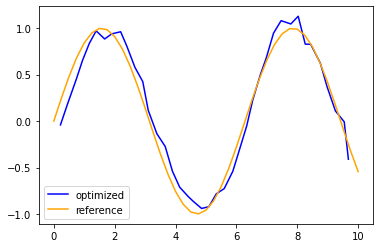

In [78]:
n_pose = 41
pose_initEstimate = pd.read_csv("../data/results/vslam-superset-poses-initEstimate.csv", header=None).values
pose_results = pd.read_csv("../data/results/vslam-superset-poses.csv", header=None).values
pose_reference = []
for i in range(1, n_pose+1):
    if i < 10:
        f = open("../data/vslam_superset1/low_density/low_noise/00000" + str(i) + ".txt")
    else:
        f = open("../data/vslam_superset1/low_density/low_noise/0000"  + str(i) + ".txt")
    lines = f.readlines()
    odom_values = lines[1].split()
    pose = []
    for val in odom_values:
        pose.append(float(val))
    pose_reference.append(pose)
pose_reference = np.array(pose_reference)
plt.plot(pose_results[:,0], pose_results[:,1], color="blue", label="optimized")
plt.plot(pose_reference[:,0], pose_reference[:,1], color="orange", label="reference")
plt.legend()
print("pose init err: ", np.mean(np.abs(pose_initEstimate - pose_reference[:len(pose_initEstimate),:]), 0))
print("pose optimization err: ", np.mean(np.abs(pose_results - pose_reference[:len(pose_results),:]), 0))

## Check data used for optimization

In [68]:
epsilon = 1
clms = pd.read_csv("../data/results/clms.csv", header=None).values
for clm in clms:
    poseIdx = clm[0]
    landmarkIdx = clm[1]
    if (poseIdx < 10):
        f = open("../data/vslam_superset1/low_density/low_noise/00000" + str(int(poseIdx)) + ".txt")
    else:
        f = open("../data/vslam_superset1/low_density/low_noise/0000"  + str(int(poseIdx)) + ".txt")
    lines = f.readlines()
    for line in lines[2:]:
        values = line.split()
        if ( int(values[0]) == int(landmarkIdx) ):
            if abs(clm[2] - float(values[1]) ) > epsilon or abs(clm[3] - float(values[2]) ) > epsilon:
                print("unexpected clm: ", clm, "expect: ", values)
            break
    f.close()

[  1.      5.    291.043 419.668] ['5', '291.043241', '419.668166']
[  2.      5.    283.304 426.081] ['5', '283.303746', '426.081009']
[  1.      29.     315.841   59.3444] ['29', '315.840951', '59.344420']
[  2.      29.     307.994   54.3146] ['29', '307.994223', '54.314624']
[  1.      48.     565.65    56.3366] ['48', '565.649891', '56.336603']
[  2.      48.     569.929   46.7586] ['48', '569.928712', '46.758618']
[  1.      79.     234.023   57.7922] ['79', '234.022672', '57.792235']
[  2.      79.     227.319   54.8877] ['79', '227.318699', '54.887722']
[  1.     83.    120.366 270.095] ['83', '120.365960', '270.095468']
[  2.     83.    114.031 270.939] ['83', '114.030717', '270.938973']
[  3.      5.    261.136 434.098] ['5', '261.135828', '434.098435']
[  3.      29.     286.814   49.8295] ['29', '286.813621', '49.829476']
[  3.      48.     551.651   46.6299] ['48', '551.651453', '46.629918']
[  3.      79.     202.539   47.4217] ['79', '202.539068', '47.421680']
[  3.     